In [8]:
import sys
import numpy as np
import pandas as pd
import pickle
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import time
import itertools
import random

from sklearn.utils import shuffle

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import Conv2D, Activation, Input, concatenate
from tensorflow.keras.models import Model

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import Lambda, Flatten, Dense
from tensorflow.keras.initializers import glorot_uniform

from tensorflow.keras.layers import Layer
from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
   

from keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout
from PIL import Image

import tensorflow
tensorflow.__version__

'2.1.0'

In [9]:
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'AIML Capstone Project - CV - Car detection.pdf',
 'AIML- Capstone Overview.pdf',
 'cv_ref.pdf',
 'data',
 'images',
 'index.html',
 'Interim Report Format.pdf',
 'PreView_Data.ipynb',
 'README.md',
 'styles.css']

In [10]:
path='data/'
# fetching all directories list

dirList=next(os.walk(path))[1]
dirList.sort()
dirList

['Annotations-20210501T103502Z-001', 'Car Images-20210501T094840Z-001']

In [205]:
path1='data/Car Images-20210501T094840Z-001/Car Images/Train Images'
path2='data/Car Images-20210501T094840Z-001/Car Images/Test Images'
path3='data/Annotations-20210501T103502Z-001/Annotations'
# fetching all directories list

dirList=next(os.walk(path1))[1]
dirList.sort()
dirList



['AM General Hummer SUV 2000',
 'Acura Integra Type R 2001',
 'Acura RL Sedan 2012',
 'Acura TL Sedan 2012',
 'Acura TL Type-S 2008',
 'Acura TSX Sedan 2012',
 'Acura ZDX Hatchback 2012',
 'Aston Martin V8 Vantage Convertible 2012',
 'Aston Martin V8 Vantage Coupe 2012',
 'Aston Martin Virage Convertible 2012',
 'Aston Martin Virage Coupe 2012',
 'Audi 100 Sedan 1994',
 'Audi 100 Wagon 1994',
 'Audi A5 Coupe 2012',
 'Audi R8 Coupe 2012',
 'Audi RS 4 Convertible 2008',
 'Audi S4 Sedan 2007',
 'Audi S4 Sedan 2012',
 'Audi S5 Convertible 2012',
 'Audi S5 Coupe 2012',
 'Audi S6 Sedan 2011',
 'Audi TT Hatchback 2011',
 'Audi TT RS Coupe 2012',
 'Audi TTS Coupe 2012',
 'Audi V8 Sedan 1994',
 'BMW 1 Series Convertible 2012',
 'BMW 1 Series Coupe 2012',
 'BMW 3 Series Sedan 2012',
 'BMW 3 Series Wagon 2012',
 'BMW 6 Series Convertible 2007',
 'BMW ActiveHybrid 5 Sedan 2012',
 'BMW M3 Coupe 2012',
 'BMW M5 Sedan 2010',
 'BMW M6 Convertible 2010',
 'BMW X3 SUV 2012',
 'BMW X5 SUV 2007',
 'BMW X6

In [12]:
def get_immediate_subdirectories(a_dir):
    return [name for name in os.listdir(a_dir)
            if os.path.isdir(os.path.join(a_dir, name))]

In [13]:
cat_Folder_list=get_immediate_subdirectories(path1)

In [14]:
trnImg=0
df=pd.DataFrame(columns=['Car Details','No of Images'])
df2=pd.DataFrame(columns=['file_name','fol_details'])
for img in cat_Folder_list:
    c1=len(os.listdir(os.path.join(path1, img)))
    df=df.append({'Car Details': img ,'No of Images' : c1},ignore_index=True)
    for filename in os.listdir(os.path.join(path1, img)):
        df2=df2.append({'file_name':filename,'fol_details':img},ignore_index=True)
    #print('{}   -->   {} training images'.format(img, len(os.listdir(os.path.join(path1, img)))))
    trnImg+=c1
    
print('Total Traing Images:',trnImg)
    
df

Total Traing Images: 8144


,Car Details,No of Images
0,Acura Integra Type R 2001,45
1,Acura RL Sedan 2012,32
2,Acura TL Sedan 2012,43
3,Acura TL Type-S 2008,42
4,Acura TSX Sedan 2012,41
...,...,...
191,Volkswagen Golf Hatchback 1991,46
192,Volkswagen Golf Hatchback 2012,43
193,Volvo 240 Sedan 1993,46
194,Volvo C30 Hatchback 2012,42


In [15]:
df2

,file_name,fol_details
0,00198.jpg,Acura Integra Type R 2001
1,00255.jpg,Acura Integra Type R 2001
2,00308.jpg,Acura Integra Type R 2001
3,00374.jpg,Acura Integra Type R 2001
4,00878.jpg,Acura Integra Type R 2001
...,...,...
8139,06632.jpg,Volvo XC90 SUV 2007
8140,07369.jpg,Volvo XC90 SUV 2007
8141,07413.jpg,Volvo XC90 SUV 2007
8142,07609.jpg,Volvo XC90 SUV 2007


In [16]:
df_annotations=pd.read_csv(os.path.join(path3, 'Train Annotations.csv'))

In [17]:
df_annotations

,Image Name,Bounding Box coordinates,Unnamed: 2,Unnamed: 3,Unnamed: 4,Image class
0,00001.jpg,39,116,569,375,14
1,00002.jpg,36,116,868,587,3
2,00003.jpg,85,109,601,381,91
3,00004.jpg,621,393,1484,1096,134
4,00005.jpg,14,36,133,99,106
...,...,...,...,...,...,...
8139,08140.jpg,3,44,423,336,78
8140,08141.jpg,138,150,706,523,196
8141,08142.jpg,26,246,660,449,163
8142,08143.jpg,78,526,1489,908,112


In [18]:
df_annotations.columns=['file_name','x1','y1','x2','y2','class_Id']

#df_annotations=df_annotations.rename(columns={'Bounding Box coordinates':'x1','Unnamed: 2':'y1','Unnamed: 3':'x2','Unnamed: 4':'y2'})

In [19]:
df_annotations.sample(5)

,file_name,x1,y1,x2,y2,class_Id
7018,07019.jpg,17,87,615,397,69
744,00745.jpg,32,72,591,386,61
7633,07634.jpg,195,147,859,621,192
1521,01522.jpg,16,56,258,173,40
1600,01601.jpg,63,46,742,328,121


In [20]:
df_merged=pd.merge(df2,df_annotations,on='file_name')
df_merged.sample(5)

,file_name,fol_details,x1,y1,x2,y2,class_Id
3813,03630.jpg,Dodge Journey SUV 2012,426,596,2286,1416,89
6871,07717.jpg,MINI Cooper Roadster Convertible 2012,52,72,333,284,157
4794,07099.jpg,Ford Mustang Convertible 2007,125,24,882,621,107
3945,03505.jpg,Dodge Ram Pickup 3500 Quad Cab 2009,134,136,991,573,87
648,08086.jpg,Audi RS 4 Convertible 2008,41,60,318,268,12


In [21]:
df_merged.head()

,file_name,fol_details,x1,y1,x2,y2,class_Id
0,00198.jpg,Acura Integra Type R 2001,91,121,574,357,6
1,00255.jpg,Acura Integra Type R 2001,29,78,734,396,6
2,00308.jpg,Acura Integra Type R 2001,16,136,775,418,6
3,00374.jpg,Acura Integra Type R 2001,9,184,740,499,6
4,00878.jpg,Acura Integra Type R 2001,101,162,882,650,6


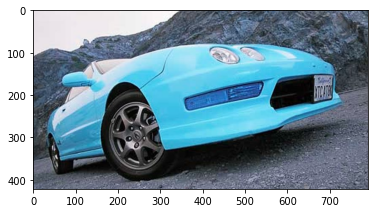

In [22]:
plt.imshow(cv2.imread('{}/{}/{}'.format(path1, df_merged.fol_details[1],df_merged.file_name[1])),cmap=None)

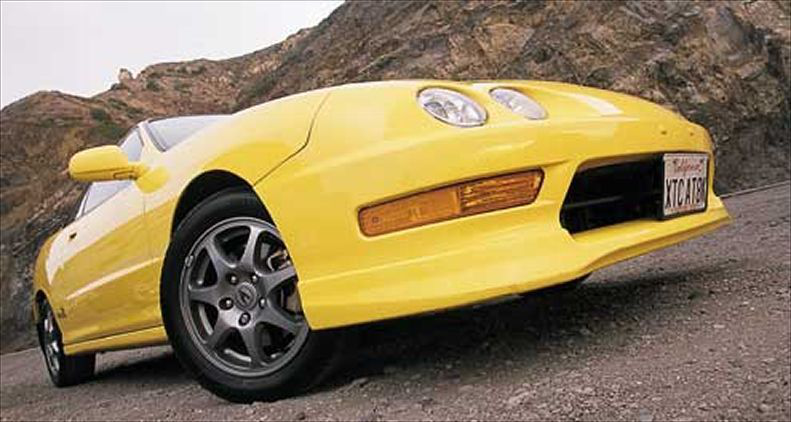

In [23]:
Image.open('{}/{}/{}'.format(path1, df_merged.fol_details[1],df_merged.file_name[1]))

In [24]:
Image.open('{}/{}/{}'.format(path1, df_merged.fol_details[1],df_merged.file_name[1])).size

(791, 422)

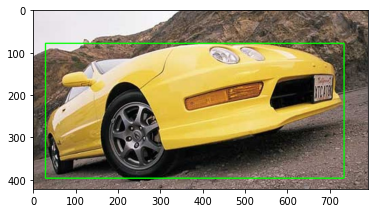

In [26]:
#file='F:\\GreatLearning\\AI\\ComputerVision\\Project2\\Part1\\training_images\\img001.PNG'
im = cv2.imread(str('{}/{}/{}'.format(path1, df_merged.fol_details[1],df_merged.file_name[1])))
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)#change color space
cv2.rectangle(im,( int(df_merged.x1[1]),int(df_merged.y1[1])), (int(df_merged.x2[1]),int(df_merged.y2[1])), (0,255,0), 2)

plt.imshow(im)

In [28]:
im.shape

(422, 791, 3)

In [29]:
def viewImage(path,df,i):
    im = cv2.imread(str('{}/{}/{}'.format(path, df.fol_details[i],df.file_name[i])))
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)#change color space
    cv2.rectangle(im,( int(df.x1[i]),int(df.y1[i])), (int(df.x2[i]),int(df.y2[i])), (0,255,0), 2)

    plt.imshow(im)

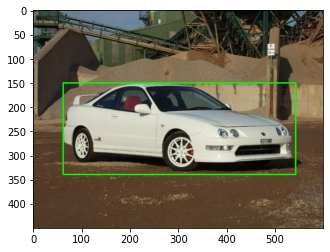

In [30]:
viewImage(path1,df_merged,9)

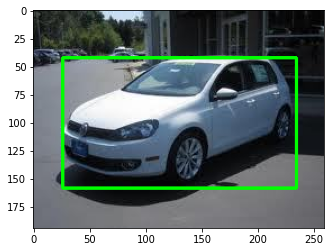

In [31]:
viewImage(path1,df_merged,8000)

#### For test

In [32]:
dirList2=next(os.walk(path2))[1]
dirList2.sort()
dirList2

['AM General Hummer SUV 2000',
 'Acura Integra Type R 2001',
 'Acura RL Sedan 2012',
 'Acura TL Sedan 2012',
 'Acura TL Type-S 2008',
 'Acura TSX Sedan 2012',
 'Acura ZDX Hatchback 2012',
 'Aston Martin V8 Vantage Convertible 2012',
 'Aston Martin V8 Vantage Coupe 2012',
 'Aston Martin Virage Convertible 2012',
 'Aston Martin Virage Coupe 2012',
 'Audi 100 Sedan 1994',
 'Audi 100 Wagon 1994',
 'Audi A5 Coupe 2012',
 'Audi R8 Coupe 2012',
 'Audi RS 4 Convertible 2008',
 'Audi S4 Sedan 2007',
 'Audi S4 Sedan 2012',
 'Audi S5 Convertible 2012',
 'Audi S5 Coupe 2012',
 'Audi S6 Sedan 2011',
 'Audi TT Hatchback 2011',
 'Audi TT RS Coupe 2012',
 'Audi TTS Coupe 2012',
 'Audi V8 Sedan 1994',
 'BMW 1 Series Convertible 2012',
 'BMW 1 Series Coupe 2012',
 'BMW 3 Series Sedan 2012',
 'BMW 3 Series Wagon 2012',
 'BMW 6 Series Convertible 2007',
 'BMW ActiveHybrid 5 Sedan 2012',
 'BMW M3 Coupe 2012',
 'BMW M5 Sedan 2010',
 'BMW M6 Convertible 2010',
 'BMW X3 SUV 2012',
 'BMW X5 SUV 2007',
 'BMW X6

In [33]:
cat_Folder_list2=get_immediate_subdirectories(path2)

In [34]:
def getFileDetails_df(path,folderList):
    totalImg=0
    df_overview=pd.DataFrame(columns=['Car Details','No of Images'])
    df_FileDetails=pd.DataFrame(columns=['file_name','fol_details'])
    for img in folderList:
        c1=len(os.listdir(os.path.join(path, img)))
        df_overview=df_overview.append({'Car Details': img ,'No of Images' : c1},ignore_index=True)
        for filename in os.listdir(os.path.join(path, img)):
            df_FileDetails=df_FileDetails.append({'file_name':filename,'fol_details':img},ignore_index=True)
        #print('{}   -->   {} training images'.format(img, len(os.listdir(os.path.join(path1, img)))))
        totalImg+=c1

    print('Total Images:',totalImg)  
    return df_overview,df_FileDetails
    


In [35]:
df_overviewTest, df_test=getFileDetails_df(path2,cat_Folder_list2)

Total Images: 8041


In [36]:
df_test.head(5)

,file_name,fol_details
0,00128.jpg,Acura Integra Type R 2001
1,00130.jpg,Acura Integra Type R 2001
2,00386.jpg,Acura Integra Type R 2001
3,00565.jpg,Acura Integra Type R 2001
4,00711.jpg,Acura Integra Type R 2001


In [37]:
df_annotations_test=pd.read_csv(os.path.join(path3, 'Test Annotation.csv'))
df_annotations_test.head(5)

,Image Name,Bounding Box coordinates,Unnamed: 2,Unnamed: 3,Unnamed: 4,Image class
0,00001.jpg,30,52,246,147,181
1,00002.jpg,100,19,576,203,103
2,00003.jpg,51,105,968,659,145
3,00004.jpg,67,84,581,407,187
4,00005.jpg,140,151,593,339,185


In [38]:
df_annotations_test.columns=['file_name','x1','y1','x2','y2','class_Id']


df_test_merged=pd.merge(df_test,df_annotations_test,on='file_name')
df_test_merged.head(5)

,file_name,fol_details,x1,y1,x2,y2,class_Id
0,00128.jpg,Acura Integra Type R 2001,122,149,743,455,6
1,00130.jpg,Acura Integra Type R 2001,27,74,774,449,6
2,00386.jpg,Acura Integra Type R 2001,86,184,723,425,6
3,00565.jpg,Acura Integra Type R 2001,15,1,545,347,6
4,00711.jpg,Acura Integra Type R 2001,126,65,735,347,6


In [39]:
df_test_merged.sample(5)

,file_name,fol_details,x1,y1,x2,y2,class_Id
4817,06879.jpg,Geo Metro Convertible 1993,25,62,569,392,123
2263,07631.jpg,Chevrolet Cobalt SS 2010,92,276,732,536,66
3485,05687.jpg,Dodge Challenger SRT8 2011,87,272,2962,2011,93
4091,01817.jpg,Ferrari California Convertible 2012,46,26,268,219,102
1722,05048.jpg,BMW X6 SUV 2012,161,58,562,317,33


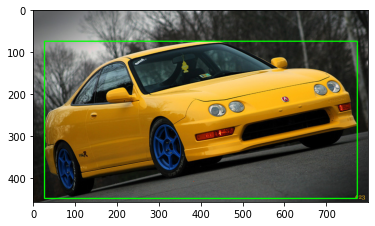

In [40]:
viewImage(path2,df_test_merged,1)

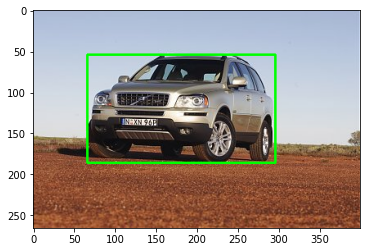

In [41]:
viewImage(path2,df_test_merged,8000)

#### Horizontal Flip

In [42]:
 def loadImage(path,df,i):
    im = cv2.imread(str('{}/{}/{}'.format(path, df.fol_details[i],df.file_name[i])))[:,:,::-1]
    #im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)#change color space
    #cv2.rectangle(im,( int(df.x1[i]),int(df.y1[i])), (int(df.x2[i]),int(df.y2[i])), (0,255,0), 2)

    return im

In [43]:
img=loadImage(path1, df_merged,1)
print(np.array(img.shape[:2])[::-1])
print(np.array(img.shape[:2])[::-1]/2)

[791 422]
[395.5 211. ]


In [44]:
print(np.array(img.shape[:2][::-1]))

[791 422]


In [45]:
box_w=abs(df_merged.x1[1] - df_merged.x2[1])
box_w

705

In [46]:
df_merged.x1[1]-box_w

-676

In [47]:
img1 = cv2.imread(str('{}/{}/{}'.format(path1, df_merged.fol_details[1],df_merged.file_name[1])))[:,:,::-1]
img1 =  img1[:,::-1,:]

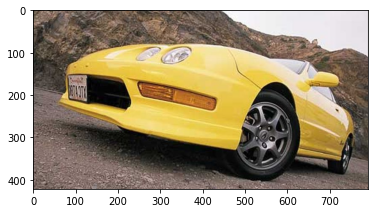

In [48]:
plt.imshow(img1)

In [306]:
img=loadImage(path1, df_merged,1)
bboxes=np.array([df_merged.x1[1],df_merged.y1[1],df_merged.x2[1],df_merged.y2[1]])
print(bboxes)
img_center = np.array(img.shape[:2])[::-1]/2
img_center = np.hstack((img_center, img_center))
print(img_center)
img =  img[:,::-1,:]
bboxes[[0,2]] = bboxes[[0,2]] + 2*(img_center[[0,2]] - bboxes[[0,2]])
print(bboxes)
print(box_w)
box_w = abs(bboxes[0] - bboxes[2])
bboxes[0] -= box_w
bboxes[2] += box_w
print(bboxes)

[ 29  78 734 396]
[395.5 211.  395.5 211. ]
[762  78  57 396]
705
[ 57  78 762 396]


In [50]:
bboxes

array([ 57,  78, 762, 396], dtype=int64)

In [51]:
bboxes[[0,2]]

array([ 57, 762], dtype=int64)

In [52]:
img_center

array([395.5, 211. , 395.5, 211. ])

In [53]:
box_w

705

In [54]:
df_merged.head(2)

,file_name,fol_details,x1,y1,x2,y2,class_Id
0,00198.jpg,Acura Integra Type R 2001,91,121,574,357,6
1,00255.jpg,Acura Integra Type R 2001,29,78,734,396,6


In [55]:
bboxes

array([ 57,  78, 762, 396], dtype=int64)

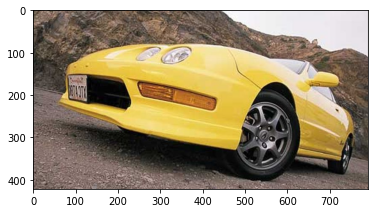

In [56]:
plt.imshow(img)

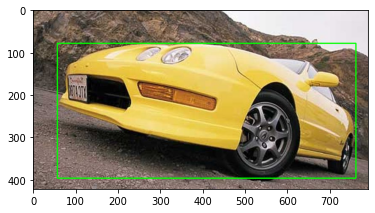

In [57]:
im=cv2.rectangle(img.copy(), (bboxes[0],bboxes[1]), (bboxes[2],bboxes[3]), (0,255,0), 2)
plt.imshow(im)

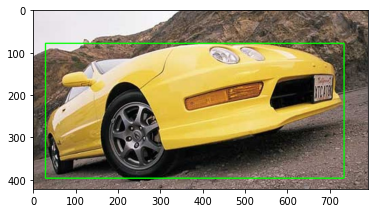

In [58]:
viewImage(path1,df_merged,1)

In [59]:
def horzFlip(path, df,i):
    img=loadImage(path, df,i)
    bboxes=np.array([df.x1[i],df.y1[i],df.x2[i],df.y2[i]])
    #print(bboxes)
    img_center = np.array(img.shape[:2])[::-1]/2
    img_center = np.hstack((img_center, img_center))

    img =  img[:,::-1,:]
    bboxes[[0,2]] = bboxes[[0,2]] + 2*(img_center[[0,2]] - bboxes[[0,2]])
    #print(bboxes)
    box_w = abs(bboxes[0] - bboxes[2])
    bboxes[0] = bboxes[0] - box_w
    bboxes[2] = bboxes[2] + box_w
    #print(bboxes)
    
    return img, bboxes

def viewUpdatedImg(image,bbox):
    im=cv2.rectangle(image.copy(), (bbox[0],bbox[1]), (bbox[2],bbox[3]), (0,255,0), 2)
    plt.imshow(im)

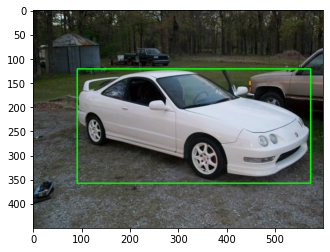

In [60]:
viewImage(path1,df_merged,0)

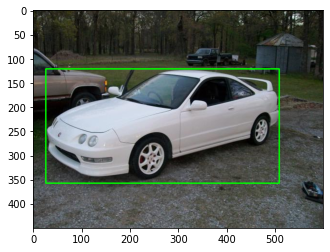

In [61]:
img0,bboxes0=horzFlip(path1,df_merged,0)
viewUpdatedImg(img0,bboxes0)

#### Scaling

In [148]:
scale=0.2

'''
One can chose to maintain the aspect ratio by constraining the scaling factor to be the same for both height and width. 
However, we can allow the scale factors to differ which not only produces a scaling augmentation 
but also changes the aspect ratio of the images. 
We introduce a boolean variable diff that can turn on/off this functionality.'''

diff=True


In [149]:
if (type(scale) == tuple):
    assert len(scale) == 2, "Invalid range"
    assert scale[0] > -1, "Scale factor can't be less than -1"
    assert scale[1] > -1, "Scale factor can't be less than -1"
else:
    assert scale > 0, "Please input a positive float"
    scale = (max(-1, -scale), scale)

In [150]:
scale

(-0.2, 0.2)

In [172]:
img=loadImage(path1, df_merged,1)
bboxes=np.array([df_merged.x1[1],df_merged.y1[1],df_merged.x2[1],df_merged.y2[1]])
bboxes

array([ 29,  78, 734, 396], dtype=int64)

In [173]:
import random
img_shape = img.shape
        
if diff:
    scale_x = random.uniform(*scale)
    scale_y = random.uniform(*scale)
else:
    scale_x = random.uniform(*scale)
    scale_y = scale_x

resize_scale_x = 1 + scale_x
resize_scale_y = 1 + scale_y

img=  cv2.resize(img, None, fx = resize_scale_x, fy = resize_scale_y)

bboxes[:4] = bboxes[:4]  * [resize_scale_x, resize_scale_y, resize_scale_x, resize_scale_y]

In [174]:
canvas = np.zeros(img_shape, dtype = np.uint8)

In [175]:
y_lim = int(min(resize_scale_y,1)*img_shape[0])
x_lim = int(min(resize_scale_x,1)*img_shape[1])

canvas[:y_lim,:x_lim,:] =  img[:y_lim,:x_lim,:]

img = canvas

In [181]:
def clip_box(bbox, clip_box):

    ar_ = (bbox_area(bbox))
    bbox[0] = np.maximum(bbox[0], clip_box[0])
    bbox[1] = np.maximum(bbox[1], clip_box[1])
    bbox[2] = np.minimum(bbox[2], clip_box[2])
    bbox[3] = np.minimum(bbox[3], clip_box[3])
    #print(x_min)
    #bbox = np.hstack((x_min, y_min, x_max, y_max, bbox[4:]))
    #print(bbox)
    #delta_area = ((ar_ - bbox_area(bbox))/ar_)
    
    #mask = (delta_area < (1 - alpha)).astype(int)
    
    #bbox = bbox[mask == 1,:]


    return bbox

def bbox_area(bbox):
    return (bbox[2] - bbox[0])*(bbox[3] - bbox[1])

In [182]:
print(bboxes)

[ 33  90 792 422]


In [183]:
bboxes = clip_box(bboxes, [0,0,1 + img_shape[1], img_shape[0]])
bboxes

array([ 33,  90, 792, 422], dtype=int64)

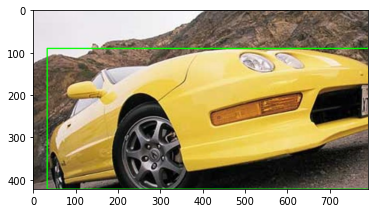

In [184]:
viewUpdatedImg(img,bboxes)

In [200]:
def scaleImage(path, df,i,scale,diff):
    
    if (type(scale) == tuple):
        assert len(scale) == 2, "Invalid range"
        assert scale[0] > -1, "Scale factor can't be less than -1"
        assert scale[1] > -1, "Scale factor can't be less than -1"
    else:
        assert scale > 0, "Please input a positive float"
        scale = (max(-1, -scale), scale)
        
    
    img=loadImage(path, df,i)
    bboxes=np.array([df.x1[i],df.y1[i],df.x2[i],df.y2[i]])
    
    img_shape = img.shape
        
    if diff:
        scale_x = random.uniform(*scale)
        scale_y = random.uniform(*scale)
    else:
        scale_x = random.uniform(*scale)
        scale_y = scale_x

    resize_scale_x = 1 + scale_x
    resize_scale_y = 1 + scale_y

    img=  cv2.resize(img, None, fx = resize_scale_x, fy = resize_scale_y)

    bboxes[:4] = bboxes[:4]  * [resize_scale_x, resize_scale_y, resize_scale_x, resize_scale_y]
    
    canvas = np.zeros(img_shape, dtype = np.uint8)
    
    y_lim = int(min(resize_scale_y,1)*img_shape[0])
    x_lim = int(min(resize_scale_x,1)*img_shape[1])

    canvas[:y_lim,:x_lim,:] =  img[:y_lim,:x_lim,:]

    img = canvas
    
    bboxes = clip_box(bboxes, [0,0,1 + img_shape[1], img_shape[0]])
    
    return img, bboxes

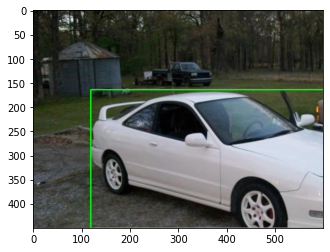

In [201]:
img,bboxes=scaleImage(path1,df_merged,0,0.4,True)
viewUpdatedImg(img,bboxes)

In [202]:
bboxes

array([119, 164, 601, 450], dtype=int64)

#### Translate

In [197]:
def translateImage(path, df,i,translate,diff):
    
    if type(translate) == tuple:
        assert len(translate) == 2, "Invalid range"  
        assert translate[0] > 0 and translate[0] < 1
        assert translate[1] > 0 and translate[1] < 1
    else:
        assert translate > 0.0 and translate < 1.0
        translate = (-translate, translate)
        
    
    img=loadImage(path, df,i)
    bboxes=np.array([df.x1[i],df.y1[i],df.x2[i],df.y2[i]])
    
    img_shape = img.shape
        
    translate_factor_x = random.uniform(*translate)
    translate_factor_y = random.uniform(*translate)
    
    if not diff:
        translate_factor_y = translate_factor_x
        
    canvas = np.zeros(img_shape).astype(np.uint8)
    
    corner_x = int(translate_factor_x*img.shape[1])
    corner_y = int(translate_factor_y*img.shape[0])
    
    orig_box_cords =  [max(0,corner_y), 
                       max(corner_x,0), 
                       min(img_shape[0], corner_y + img.shape[0]), 
                       min(img_shape[1],corner_x + img.shape[1])
                      ]
    
    mask = img[max(-corner_y, 0):min(img.shape[0], -corner_y + img_shape[0]), max(-corner_x, 0):min(img.shape[1], -corner_x + img_shape[1]),:]
    canvas[orig_box_cords[0]:orig_box_cords[2], orig_box_cords[1]:orig_box_cords[3],:] = mask
    img = canvas
    
    bboxes[:4] = bboxes[:4] + [corner_x, corner_y, corner_x, corner_y]
    
    bboxes = clip_box(bboxes, [0,0,img_shape[1], img_shape[0]])
    
    return img, bboxes

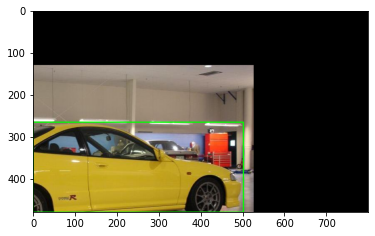

In [207]:
img,bboxes=translateImage(path1,df_merged,2,0.4,True)
viewUpdatedImg(img,bboxes)

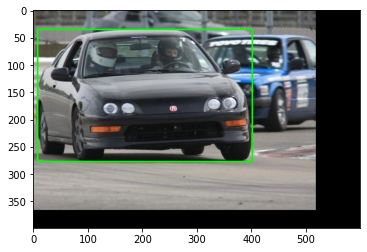

In [206]:
img,bboxes=translateImage(path1,df_merged,5,0.2,True)
viewUpdatedImg(img,bboxes)

In [199]:
bboxes

array([314, 193, 800, 475], dtype=int64)

#### Rotate

In [300]:
#rotate_im
def rotate_im(image, angle):
    """Rotate the image.
    
    Rotate the image such that the rotated image is enclosed inside the tightest
    rectangle. The area not occupied by the pixels of the original image is colored
    black. 
    
    Parameters
    ----------
    
    image : numpy.ndarray
        numpy image
    
    angle : float
        angle by which the image is to be rotated
    
    Returns
    -------
    
    numpy.ndarray
        Rotated Image
    
    """
    # grab the dimensions of the image and then determine the
    # centre
    # center = tuple(np.array(image.shape)[:2]/2)
    (h, w) = image.shape[:2]
    (cX, cY) = (w // 2, h // 2)
    #center = tuple(np.array(image.shape)[:2]/2)
    # grab the rotation matrix (applying the negative of the
    # angle to rotate clockwise), then grab the sine and cosine
    # (i.e., the rotation components of the matrix)
    # print(angle[0],cX,cY)
    
    M = cv2.getRotationMatrix2D((cX, cY), angle, 1.0)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])

    # compute the new bounding dimensions of the image
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))

    # adjust the rotation matrix to take into account translation
    M[0, 2] += (nW / 2) - cX
    M[1, 2] += (nH / 2) - cY

    # perform the actual rotation and return the image
    image = cv2.warpAffine(image, M, (nW, nH))

#    image = cv2.resize(image, (w,h))
    return image

In [301]:
def get_corners(bboxes):
    
    """Get corners of bounding boxes
    
    Parameters
    ----------
    
    bboxes: numpy.ndarray
        Numpy array containing bounding boxes of shape `N X 4` where N is the 
        number of bounding boxes and the bounding boxes are represented in the
        format `x1 y1 x2 y2`
    
    returns
    -------
    
    numpy.ndarray
        Numpy array of shape `N x 8` containing N bounding boxes each described by their 
        corner co-ordinates `x1 y1 x2 y2 x3 y3 x4 y4`      
        
    """
    width = (bboxes[2] - bboxes[0]).reshape(-1,1)
    height = (bboxes[3] - bboxes[1]).reshape(-1,1)
    
    x1 = bboxes[0].reshape(-1,1)
    y1 = bboxes[1].reshape(-1,1)
    
    x2 = x1 + width
    y2 = y1 
    
    x3 = x1
    y3 = y1 + height
    
    x4 = bboxes[2].reshape(-1,1)
    y4 = bboxes[3].reshape(-1,1)
    
    corners = np.hstack((x1,y1,x2,y2,x3,y3,x4,y4))
    
    return corners

In [302]:
def rotate_box(corners,angle,  cx, cy, h, w):
    
    """Rotate the bounding box.
    
    
    Parameters
    ----------
    
    corners : numpy.ndarray
        Numpy array of shape `N x 8` containing N bounding boxes each described by their 
        corner co-ordinates `x1 y1 x2 y2 x3 y3 x4 y4`
    
    angle : float
        angle by which the image is to be rotated
        
    cx : int
        x coordinate of the center of image (about which the box will be rotated)
        
    cy : int
        y coordinate of the center of image (about which the box will be rotated)
        
    h : int 
        height of the image
        
    w : int 
        width of the image
    
    Returns
    -------
    
    numpy.ndarray
        Numpy array of shape `N x 8` containing N rotated bounding boxes each described by their 
        corner co-ordinates `x1 y1 x2 y2 x3 y3 x4 y4`
    """

    corners = corners.reshape(-1,2)
    corners = np.hstack((corners, np.ones((corners.shape[0],1), dtype = type(corners[0][0]))))
    
    M = cv2.getRotationMatrix2D((cx, cy), angle, 1.0)
    
    
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
    
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))
    # adjust the rotation matrix to take into account translation
    M[0, 2] += (nW / 2) - cx
    M[1, 2] += (nH / 2) - cy
    # Prepare the vector to be transformed
    calculated = np.dot(M,corners.T).T
    
    calculated = calculated.reshape(-1,8)
    
    return calculated

In [303]:
def get_enclosing_box(corners):
    """Get an enclosing box for ratated corners of a bounding box
    
    Parameters
    ----------
    
    corners : numpy.ndarray
        Numpy array of shape `N x 8` containing N bounding boxes each described by their 
        corner co-ordinates `x1 y1 x2 y2 x3 y3 x4 y4`  
    
    Returns 
    -------
    
    numpy.ndarray
        Numpy array containing enclosing bounding boxes of shape `N X 4` where N is the 
        number of bounding boxes and the bounding boxes are represented in the
        format `x1 y1 x2 y2`
        
    """
    x_ = corners[[0,2,4,6]]
    y_ = corners[[1,3,5,7]]
    
    
    xmin = np.min(x_).reshape(-1,1)
    ymin = np.min(y_).reshape(-1,1)
    xmax = np.max(x_).reshape(-1,1)
    ymax = np.max(y_).reshape(-1,1)
    
    #print(xmin,xmin[0])
    
    final = np.hstack((xmin[0], ymin[0], xmax[0], ymax[0],corners[8:]))
    
    return final

In [304]:
def rotateImageBBox(path, df,i,angle):
    
    
    if type(angle) == tuple:
        assert len(angle) == 2, "Invalid Range"
    else:
        angle = (-angle,angle)
    
    angle = random.uniform(*angle)
    
    img=loadImage(path, df,i)
    bboxes=np.array([df.x1[i],df.y1[i],df.x2[i],df.y2[i]])
    
    #angle = random.uniform(*self.angle)

    w,h = img.shape[1], img.shape[0]
    cx, cy = w//2, h//2
    
    img = rotate_im(img, angle)

    corners = get_corners(bboxes)

    corners = np.hstack((corners[0], bboxes[4:]))


    corners[:8] = rotate_box(corners[:8], angle, cx, cy, h, w)

    new_bbox = get_enclosing_box(corners)


    scale_factor_x = img.shape[1] / w

    scale_factor_y = img.shape[0] / h

    img = cv2.resize(img, (w,h))

    new_bbox[:4] = new_bbox[:4]  / [scale_factor_x, scale_factor_y, scale_factor_x, scale_factor_y] 

    bboxes  = new_bbox

    bboxes = clip_box(bboxes, [0,0,w, h])

    return img, bboxes

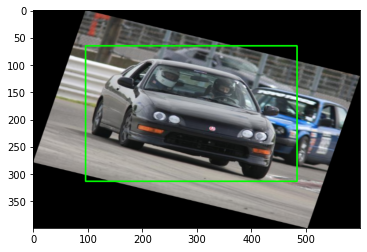

In [305]:
img,bboxes=rotateImageBBox(path1,df_merged,5,30.0)
viewUpdatedImg(img,bboxes)

#### Shearing

In [318]:
def shearImage(path, df,i,shear_factor):
 
    if type(shear_factor) == tuple:
        assert len(shear_factor) == 2, "Invalid range for scaling factor"   
    else:
        shear_factor = (-shear_factor, shear_factor)
        
    shear_factor = random.uniform(*shear_factor)          
     
    img=loadImage(path, df,i)
    bboxes=np.array([df.x1[i],df.y1[i],df.x2[i],df.y2[i]])
    
    w,h = img.shape[1], img.shape[0]

    if shear_factor < 0:
        img, bboxes = horzFlip(path,df,i)

    M = np.array([[1, abs(shear_factor), 0],[0,1,0]])

    nW =  img.shape[1] + abs(shear_factor*img.shape[0])

    bboxes[[0,2]] = bboxes[[0,2]] + ((bboxes[[1,3]]) * abs(shear_factor) ).astype(int) 


    img = cv2.warpAffine(img, M, (int(nW), img.shape[0]))

    if shear_factor < 0:
        img, bboxes = horzFlip(path,df,i)

    img = cv2.resize(img, (w,h))

    scale_factor_x = nW / w

    bboxes[:4] = bboxes[:4] / [scale_factor_x, 1, scale_factor_x, 1] 


    return img, bboxes

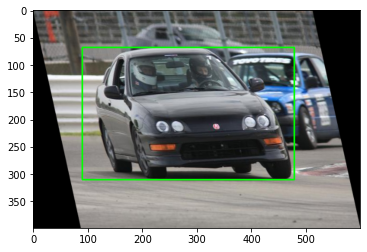

In [320]:
img,bboxes=shearImage(path1,df_merged,5,0.7)
viewUpdatedImg(img,bboxes)